In [1478]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.sparse
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# Load Datasets

In [1479]:
d = datasets.load_digits(as_frame=True)
digits = d['data']
digits_target = d['target']

c = datasets.fetch_openml(name='credit-g', as_frame=True)
credit = c['data']
credit_target = c['target']

digits, digits_test, digits_target, digits_target_test = train_test_split(digits, digits_target, test_size = 0.2, random_state = 0)

credit, credit_test, credit_target, credit_target_test = train_test_split(credit, credit_target, test_size = 0.2, random_state = 0)

print (digits)


      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1109        0.0        0.0        0.0        9.0       15.0        2.0   
940         0.0        3.0       12.0       12.0       14.0        4.0   
192         0.0        1.0       10.0       15.0       16.0       13.0   
260         0.0        0.0        0.0       12.0        4.0        0.0   
1148        0.0        0.0        0.0        9.0       16.0        3.0   
...         ...        ...        ...        ...        ...        ...   
835         0.0        1.0        8.0       14.0       15.0        2.0   
1216        0.0        2.0        9.0       15.0       16.0       15.0   
1653        0.0        0.0        5.0       14.0       14.0        2.0   
559         0.0        0.0        4.0       10.0       15.0       16.0   
684         0.0        0.0        6.0       14.0       13.0        4.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
1109        0.0        0.0      

## Preprocess Digits

In [1480]:
# no preprocessing needed 
df = digits.transform(lambda x: x if (np.amax(x) == 0) else (x / np.amax(x)))
digits_final = pd.concat([df, digits_target], axis=1)
digits_final.reset_index(drop=True, inplace=True)
print (digits_final)

df2 = digits_test.transform(lambda x: x if (np.amax(x) == 0) else (x / np.amax(x)))
digits_test_final = pd.concat([df2, digits_target_test], axis=1)
digits_test_final.reset_index(drop=True, inplace=True)
print (digits_test_final)


      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0      0.000     0.0000     0.5625     0.9375     0.1250   
1           0.0      0.375     0.7500     0.7500     0.8750     0.2500   
2           0.0      0.125     0.6250     0.9375     1.0000     0.8125   
3           0.0      0.000     0.0000     0.7500     0.2500     0.0000   
4           0.0      0.000     0.0000     0.5625     1.0000     0.1875   
...         ...        ...        ...        ...        ...        ...   
1432        0.0      0.125     0.5000     0.8750     0.9375     0.1250   
1433        0.0      0.250     0.5625     0.9375     1.0000     0.9375   
1434        0.0      0.000     0.3125     0.8750     0.8750     0.1250   
1435        0.0      0.000     0.2500     0.6250     0.9375     1.0000   
1436        0.0      0.000     0.3750     0.8750     0.8125     0.2500   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0000        0.0      

## Preprocess Credit

In [1481]:
#everything good with data except categorical to one hot needed 
credit_cat = ['checking_status', 'purpose', 'credit_history', 'savings_status', 'employment', 'personal_status', 'other_parties',
             'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker', 'class']

def extract_columns (df, cols):
    return df.loc[:, cols]

def get_onehot (df, cat_feat):
    categories = extract_columns(df, cat_feat)
    le = LabelEncoder()
    return categories.apply(lambda col: le.fit_transform(col))

merged_credit = pd.concat([credit, credit_target], axis=1)
merged_credit.reset_index(drop=True, inplace=True)

merged_credit_test = pd.concat([credit_test, credit_target_test], axis=1)
merged_credit_test.reset_index(drop=True, inplace=True)

one_hot_cols = get_onehot(merged_credit, credit_cat)
credit_no_cat = merged_credit.drop(credit_cat, axis = 1) 
credit_no_cat = credit_no_cat.transform(lambda x: x if (np.amax(x) == 0) else (x / np.amax(x))) #normalize continuous data
credit_final = pd.concat([credit_no_cat, one_hot_cols], axis=1)


one_hot_cols_test = get_onehot(merged_credit_test, credit_cat)
credit_test_no_cat = merged_credit_test.drop(credit_cat, axis=1)
credit_test_no_cat = credit_test_no_cat.transform(lambda x: x if (np.amax(x) == 0) else (x / np.amax(x)))
credit_test_final = pd.concat([credit_test_no_cat, one_hot_cols_test], axis=1)

#le = LabelEncoder()

#credit_target = le.fit_transform(credit_target)
#credit_target_test = le.fit_transform(credit_target_test)

print (credit_final)
print (credit_test_final)



     duration  credit_amount  installment_commitment  residence_since  \
0    0.500000       0.155341                    1.00             0.75   
1    0.333333       0.169507                    1.00             0.25   
2    0.833333       0.402084                    1.00             0.50   
3    0.208333       0.068606                    0.50             0.50   
4    0.083333       0.084347                    0.25             0.50   
..        ...            ...                     ...              ...   
795  0.166667       0.058728                    1.00             1.00   
796  0.375000       0.212495                    1.00             0.50   
797  0.125000       0.207990                    0.25             1.00   
798  0.250000       0.104646                    0.50             0.50   
799  0.500000       0.535009                    0.25             0.75   

          age  existing_credits  num_dependents  checking_status  purpose  \
0    0.400000              0.25             0.

In [1482]:
"""
Optimizer class implementing minibatch gradient descent for softmax regression. Can utilize either
    gradient descent with momentum, or Adaptive Momentum Estimation (Adam), with optional L1 or L2
    regularization.
"""
# Imports
import numpy as np
from sklearn.utils import shuffle


def softmax(z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T


# Shuffles the (x,y) instances, and outputs a list of minibatch_size sized (x,y) tuples
def minibatch(x, y, minibatch_size):
    x, y = shuffle(x, y)
    minibatches = []
    if not minibatch_size:
        minibatches.append((x, y))
    else:
        for i in range(0, x.shape[0], minibatch_size):
            x_mini = x[i:i+minibatch_size]
            y_mini = y[i:i+minibatch_size]
            minibatches.append((x_mini, y_mini))
    return minibatches


# Accuracy function
def accuracy(y, yh):
    B = np.where(yh.ravel() >= 0.5, 1, 0)
    return np.mean(y.ravel() == B)


# Returns the index of the maximum value in a list
def argmax(lst):
    return lst.index(max(lst))


class GradientDescent:

    """
    Class fields:
       alphaa - learning rate of the optimizer
       beta1 - momentum hyperparameter
       max_iterations - gradient descent termination condition: maximum times iterated
       max_no_change - gradient descent termination condition: maximum number of iterations
                         without the validation error decreasing
       minibatch_size - size of the minibatch to use (default value of 0 indicates use full batch)
       cost_fn - optional cost function, if included optimizer will calculate and store the
                    training and validation cost at each iteration
       adaptive - if true, optimizer uses Adam (Adaptive Moment Estimation) rather than gradient
                    descent with momentum
       beta2 - 2nd hyperparameter for Adam (if using)
       epsilon - 3rd hyperparameter for Adam (if using), just to avoid numerical issues
       regularize - determines regularization used (if any): 0 indicates no regularization, 1 or 2
                      indicate L1 or L2 regularization respectively
       lambdaa - regularization coefficient if used
    """
    # Constructor
    def __init__(self, alphaa=0.01, beta1=0.9, max_iterations=1e4, max_no_change=20, minibatch_size=0,
                 cost_fn=None, adaptive=False, beta2=0.999, epsilon=1e-8, regularize=0, lambdaa=0.1):

        self.alphaa = alphaa
        self.beta1 = beta1
        self.max_iterations = max_iterations
        self.max_no_change = max_no_change
        self.minibatch_size = minibatch_size
        self.cost_fn = cost_fn

        self.adaptive = adaptive
        self.beta2 = beta2
        self.epsilon = epsilon

        self.regularize = regularize
        self.lambdaa = lambdaa

        self.accuracy_tr = []
        self.accuracy_val = []
        self.weight_history = []
        if self.cost_fn:
            self.cost_tr = []
            self.cost_val = []
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        self.accuracy_tr = []
        self.accuracy_val = []
        self.weight_history = []
        return self
    
    # Run method - delegates work to one of 2 helper methods, dependent on if Adam is being used or not
    def run(self, x_tr, y_tr, x_val, y_val, w):
        if self.adaptive:
            return self.adam(x_tr, y_tr, x_val, y_val, w)
        else:
            return self.momentum(x_tr, y_tr, x_val, y_val, w)

    # Gradient Descent with Momentum
    def momentum(self, x_tr, y_tr, x_val, y_val, w):
        t = 1
        i = 0
        delta_w = 0

        self.accuracy_tr.append(accuracy(y_tr, softmax(np.dot(x_tr, w))))
        self.accuracy_val.append(accuracy(y_val, softmax(np.dot(x_val, w))))
        self.weight_history.append(w)

        while i < self.max_no_change and t < self.max_iterations:
            for (x_mini, y_mini) in minibatch(x_tr, y_tr, self.minibatch_size):
                grad = self.gradient(x_mini, y_mini, w)
                delta_w = (self.beta1 * delta_w) + ((1 - self.beta1) * grad)
                w -= self.alphaa * delta_w

            self.weight_history.append(w)
            tr_pred = softmax(np.dot(x_tr, w))
            pred = softmax(np.dot(x_val, w))
            self.accuracy_tr.append(accuracy(y_tr, tr_pred))
            self.accuracy_val.append(accuracy(y_val, pred))
            if self.cost_fn:
                self.cost_tr.append(self.cost_fn(y_tr, tr_pred))
                self.cost_val.append(self.cost_fn(y_val, pred))

            if not self.accuracy_val[-1] < self.accuracy_val[-2]:
                i += 1
            else:
                i = 0
            t += 1
        return self.weight_history[argmax(self.accuracy_val)]

    # Adaptive Moment Estimation
    def adam(self, x_tr, y_tr, x_val, y_val, w):
        t = 1
        i = 0
        m = 0
        s = 0

        self.accuracy_tr.append(accuracy(y_tr, softmax(np.dot(x_tr, w))))
        self.accuracy_val.append(accuracy(y_val, softmax(np.dot(x_val, w))))
        self.weight_history.append(w)

        while i < self.max_no_change and t < self.max_iterations:
            for (x_mini, y_mini) in minibatch(x_tr, y_tr, self.minibatch_size):
                grad = self.gradient(x_mini, y_mini, w)
                m = (self.beta1 * m) + ((1 - self.beta1) * grad)
                s = (self.beta2 * s) + ((1 - self.beta2) * np.power(grad, 2))
                mh = m / (1 - np.power(self.beta1, t))
                sh = s / (1 - np.power(self.beta2, t))
                w -= self.alphaa * mh * grad / (np.sqrt(sh) + self.epsilon)

            self.weight_history.append(w)
            tr_pred = softmax(np.dot(x_tr, w))
            pred = softmax(np.dot(x_val, w))
            self.accuracy_tr.append(accuracy(y_tr, tr_pred))
            self.accuracy_val.append(accuracy(y_val, pred))
            if self.cost_fn:
                self.cost_tr.append(self.cost_fn(y_tr, tr_pred))
                self.cost_val.append(self.cost_fn(y_val, pred))

            if not self.accuracy_val[-1] < self.accuracy_val[-2]:
                i += 1
            else:
                i = 0
            t += 1
        return self.weight_history[argmax(self.accuracy_val)]

    # Helper method to calculate gradient (and add regularization penalty if any)
    def gradient(self, x, y, w):
        n, d = x.shape
        yh = softmax(np.dot(x, w))

        grad = np.dot(x.T, yh - y) / n
        if self.regularize == 1:
            grad[1:] += self.lambdaa * np.sign(w[1:])
        elif self.regularize == 2:
            grad[1:] += self.lambdaa * w[1:]
        return grad

In [1618]:

class SoftmaxRegression:

    def __init__(self, learning_rate=0.01, max_iters=50, minibatches=1):

      
        self.max_iters = max_iters
        self.l2 = 0.0
        self.learning_rate = learning_rate
        self.minibatches = minibatches
        self.costs = []

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    #Predicting labels
    def predict(self, X):
        return np.argmax(self.softmax(X.dot(self.weights)), axis=1)
    
    #Softmax
    def softmax(self, z):
        return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

    def get_one_hot_labels(self, y):
        one_hot = np.zeros((y.shape[0], (1+max(y)))).astype(np.float)   
        for z in range(len(y)):
            one_hot[z, y[z]] = 1
       
        return one_hot 

    def fit(self, X_tr, y_tr, X_val, y_val, gd):
       
        self._n_features = X_tr.shape[1]
        y_tr_1h = self.get_one_hot_labels(y=y_tr)
        y_val_1h = self.get_one_hot_labels(y=y_val)
        
        np.random.seed(0)
        self.weights = np.random.normal(loc=0.0, scale=0.01, size=(self._n_features, y_tr_1h.shape[1])).astype('float64')
        self.costs = []

        j = 0
        MAX_j = self.max_iters
        while j < MAX_j:
            #GRADIENT DESCENT optimizer (make sure to split X, y into training and validation sets)
            self._w = gd.run(X_tr,y_tr_1h,X_val,y_val_1h,self.weights)

            j += 1
        return self


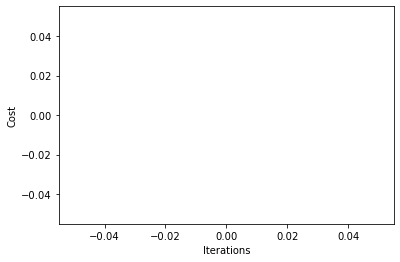

In [1619]:


# Loading Data


x_train = digits_final.loc[:,digits_final.columns != "target"]
y_train = digits_final.loc[:,digits_final.columns == "target"]

x_test = digits_test_final.loc[:,digits_test_final.columns != "target"]
y_test = digits_test_final.loc[:,digits_test_final.columns == "target"]

#standardize
# X[:,0] = X[:,0] / np.amax(X[:,0])
# X[:,1] = X[:,1] / np.amax(X[:,1])


lr = SoftmaxRegression(learning_rate=0.00001, max_iters=250, minibatches=1)
gd = GradientDescent()
lr.fit(x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), gd)

# #X_plt = X[:, [0,1]]

# #plot_decision_regions(X_plt, y, clf=lr)
# #plt.title('Softmax Regression - Gradient Descent')
# #plt.show()

plt.plot(range(len(lr.costs)), lr.costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [1595]:
digits_target_test.values[0:]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 7,
       3, 4, 8, 9, 7, 9, 8, 2, 6, 5, 2, 5, 8, 4, 8, 7, 0, 6, 1, 5, 9, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 5, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 8, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 9, 2, 1, 4, 2, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [1596]:

y_pred = lr.predict(digits_test.values)
print('Last 2 Class Labels: %s' % y_pred[0:])



Last 2 Class Labels: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 9 0 7 6 2 1 9 6 7 9 0 0 9 1 6 3 0 2 3 4 1 9 7 6 9 1 8 3 5 1
 2 1 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 7 8 0 1 9 2 5 8 4 1 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 7 7 6 7 6 5 6 0 8 8 9 3 6 1 0 7 1 6 3 8 6 7 4 9 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 3 9 4 7 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 3 2 0 7 6 1 1 3 7 2 7 1 5 5 7 5 2 2 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 6 7 2 0 9 6 0 4 2 0 7 5 8 5 7 8 2 8 4 3 7 2 6 5 9 5 1 0 8 2 5 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 8 8 8]


# Analysis

## Cross-Validation Class

In [91]:
class Cross_Validation:
    def cross_validate(self, data, k, model, gradient_obj, test_cols): 
        
        train_col = None
        
        for c in test_cols:
            if c in data:
                train_col = c
                break
        
        shuffled_data = data.sample(frac=1, random_state=0).reset_index(drop=True)
            
        folds = np.array_split(shuffled_data, k)
        
        accuracy_sum = 0
        
        for i in range(k):
            folds_to_train = folds.copy()
            fold_to_test = folds_to_train[i]
            del folds_to_train[i]
            folds_to_train = pd.concat(folds_to_train, sort=False)
            
            x_train = folds_to_train.loc[:,folds_to_train.columns != train_col]
            y_train = folds_to_train.loc[:,folds_to_train.columns == train_col]
            
            x_test = fold_to_test.loc[:,fold_to_test.columns != train_col]
            y_test = fold_to_test.loc[:,fold_to_test.columns == train_col]
            model.fit(x_train, y_train.values.ravel(), x_test, y_test.values.ravel(), gradient_obj)
            predictions = model.predict(x_test.to_numpy())
            accuracy_sum += np.mean(predictions == y_test.values.ravel())
            
        return accuracy_sum / k
    
    def cross_validate_nb(self, data, k, model, test_cols): 
        
        train_col = None
        
        for c in test_cols:
            if c in data:
                train_col = c
                break
        
        shuffled_data = data.sample(frac=1, random_state=0).reset_index(drop=True)
            
        folds = np.array_split(shuffled_data, k)
        
        accuracy_sum = 0
        
        for i in range(k):
            folds_to_train = folds.copy()
            fold_to_test = folds_to_train[i]
            del folds_to_train[i]
            folds_to_train = pd.concat(folds_to_train, sort=False)
            
            x_train = folds_to_train.loc[:,folds_to_train.columns != train_col]
            y_train = folds_to_train.loc[:,folds_to_train.columns == train_col]
            
            x_test = fold_to_test.loc[:,fold_to_test.columns != train_col]
            y_test = fold_to_test.loc[:,fold_to_test.columns == train_col]
            
            model.fit(x_train, y_train.values.ravel())
            predictions = model.predict(x_test.to_numpy())
            accuracy_sum += np.mean(predictions == y_test.values.ravel())
            
        return accuracy_sum / k


In [92]:
# set up grid testing


# param_grid = [
#   {'learning_rate': np.arange(0.00001, 0.0001, 0.00005), 'max_iters': [250], 'random_seed':[0],
#   'alphaa': np.arange(0.001, 0.011, 0.01), 'beta1': np.arange(0.9, 0.99, 0.09), 'max_iterations': [1e4], 'max_no_change': np.arange(10,20,10), 
#   'adaptive': [False], 'beta2': np.arange(0.99, 0.999, 0.009), 'epsilon': np.arange(1e-9, 1e-8, 9e-9), 'minibatch_size': np.arange(1,10, 9),
#   'regularize': [0,1,2], 'lambdaa': np.arange(0.01, 0.1, 0.09)}
# ]


#merge train and train targets, send to cross validation for each grid
# print (digits_final)
# print (credit_final)

class Tester:
  
  def __init__(self, learning_rate=0.01, max_iters=50, alphaa=0.001, beta1=0.9, max_iterations=1e4, max_no_change=20,
                adaptive=False, beta2=0.999, epsilon=1e-8, minibatch_size=0, regularize=0, lambdaa=0.1):
      self.learning_rate = learning_rate
      self.max_iters = max_iters
      self.alphaa = alphaa
      self.beta1 = beta1
      self.max_iterations = max_iterations
      self.max_no_change = max_no_change
      self.adaptive = adaptive
      self.beta2 = beta2
      self.epsilon = epsilon
      self.regularize = regularize
      self.lambdaa = lambdaa
      self.minibatch_size = minibatch_size    
      self.lr = None
      self.gd = None
    
#     def get_params(self, deep=True):
#         # suppose this estimator has parameters "alpha" and "recursive"
#         params = {'learning_rate': self.learning_rate, 'max_iters': self.max_iters, 'random_seed':self.random_seed,
#                   'alphaa': self.alphaa, 'beta1': self.beta1, 'max_iterations': self.max_iterations, 'max_no_change': self.max_no_change, 
#                   'adaptive': self.adaptive, 'beta2':self.beta2, 'epsilon': self.epsilon, 'minibatch_size': self.minibatch_size,
#                   'regularize': self.regularize, 'lambdaa': self.lambdaa}
#         return params

  def set_params(self, **parameters):
      for parameter, value in parameters.items():
          setattr(self, parameter, value)
      return self

  def predict_score(self, X, train_col):
    x_test = X.loc[:,X.columns != train_col]
    y_test = X.loc[:,X.columns == train_col]
    predictions = self.lr.predict(x_test.to_numpy())
    a = np.mean(predictions == y_test.values.ravel())
    return a
  
  def fit(self,X):
    if self.lr is None:
            self.lr = SoftmaxRegression(learning_rate=self.learning_rate, max_iters=self.max_iters)
    else:
        self.lr.set_params(learning_rate=self.learning_rate, max_iters=self.max_iters)
    if self.gd is None:
      self.gd = GradientDescent(alphaa=self.alphaa, max_iterations=self.max_iterations, max_no_change=self.max_no_change,
                              adaptive=self.adaptive, beta2=self.beta2, epsilon=self.epsilon, regularize=self.regularize,
                              lambdaa=self.lambdaa, minibatch_size=self.minibatch_size)
    else:
        self.gd.set_params(alphaa=self.alphaa, max_iterations=self.max_iterations, max_no_change=self.max_no_change,
                              adaptive=self.adaptive, beta2=self.beta2, epsilon=self.epsilon, regularize=self.regularize,
                              lambdaa=self.lambdaa, minibatch_size=self.minibatch_size)
    self.acc = cross.cross_validate(X, 5, self.lr, self.gd, ['target', 'class'])
    print (self.acc)
    return self.acc
        
    
# def test_scorer(estimator, X):
#     print (estimator.accuracy)
#     return estimator.accuracy

learning_rates = [0.01, 0.001, 0.0001]
max_iters = [250]
alphas = [0.01, 0.1]
beta1s = [0.99, 0.9]
max_iterations = [1e4]
max_no_changes = [20]
adaptives = [False]
beta2s = [0.99]
epsilons = [1e-8]
minibatch_sizes = minibatch_sizes = [0]
regularizes = [0]
lambdas = [0.1]

# learning_rates = [0.01]
# max_iters = [250]
# alphas = [0.01]
# beta1s = [0.9]
# max_iterations = [1e4]
# max_no_changes = [20]
# adaptives = [False]
# beta2s = [0.999]
# epsilons = [1e-8]
# minibatch_sizes = [500]
# regularizes = [0]
# lambdas = [0.1]

combos = np.array(np.meshgrid(learning_rates, max_iters, alphas, beta1s, max_iterations, max_no_changes, adaptives, beta2s,
               epsilons, minibatch_sizes, regularizes, lambdas)).T.reshape(-1, 12)

print (len(combos))
cross = Cross_Validation()

class GridSearcher:    
    def grid_search(self, data, combinations):
        t = None
        max_accuracy = 0
        min_time = 0

        self.accuracies = []
        self.train_times = []

        for row in combos:
            if t is None:
                t = Tester(learning_rate=row[0], max_iters=int(row[1]), alphaa=row[2], beta1=row[3], max_iterations=int(row[4]),
                          max_no_change=int(row[5]), adaptive=row[6], beta2=row[7], epsilon=row[8], minibatch_size=int(row[9]), regularize=int(row[10]),
                          lambdaa=row[11])
            else:
                t.set_params(learning_rate=row[0], max_iters=int(row[1]), alphaa=row[2], beta1=row[3], max_iterations=int(row[4]),
                          max_no_change=int(row[5]), adaptive=row[6], beta2=row[7], epsilon=row[8], minibatch_size=int(row[9]), regularize=int(row[10]),
                          lambdaa=row[11])
            start_time = time.time()
            a = t.fit(data)
            run_time = time.time() - start_time
            
            self.accuracies.append(a)
            self.train_times.append(run_time)
        




# def tester_scorer_credit(estimator, X):
#     error = cross.cross_validate(X, 5, estimator.lr, estimator.gd, 'class')
#     return error

# cv = [(slice(None), slice(None))] # dont use grid search cross validation, want to use our own
# gs = GridSearchCV(estimator=Tester(), param_grid=param_grid, 
#                   scoring=test_scorer, cv=cv, n_jobs=-1)

# gs.fit(digits_final)
#get best hyper parameters, then run test data using them



12


In [ ]:
g2 = GridSearcher()
g2.grid_search(credit_final, combos)

In [17]:
g = GridSearcher()
g.grid_search(digits_final, combos)

#
# This was run in a different notebook!!!
# Here was the best combination found:
# [1.0e-02 2.5e+02 1.0e-01 9.9e-01 1.0e+04 2.0e+01 0.0e+00 9.9e-01 1.0e-08
#  0.0e+00 0.0e+00 1.0e-01]

# Accuracies
# [0.9178934378629501, 0.9178934378629501, 0.9178934378629501, 0.9519889663182347,
# 0.9519889663182347, 0.9519889663182347, 0.9178934378629501, 0.9178934378629501, 0.9178934378629501,
# 0.9519889663182347, 0.9519889663182347, 0.9519889663182347]

# Times:
# [147.17668795585632, 145.1846740245819, 148.09876251220703, 155.62589025497437, 161.66813945770264,
#     158.38603472709656, 158.83990502357483, 159.7523591518402, 161.17647981643677, 164.87901282310486,
#     166.36938381195068, 169.39296007156372]
#

[1.00e-02 2.50e+02 1.00e-02 9.00e-01 1.00e+04 2.00e+01 0.00e+00 9.99e-01
 1.00e-08 0.00e+00 0.00e+00 1.00e-01]


KeyboardInterrupt: 

In [54]:
best_values = [1.0e-02, 2.5e+02, 1.0e-01, 9.9e-01, 1.0e+04, 2.0e+01, 0.0e+00, 9.9e-01, 1.0e-08, 0.0e+00, 0.0e+00, 1.0e-01]

In [66]:
mini_sizes = [250, 500, 750, 1000, 0]

train_times1 = []
# train_times2 = []
accuracies1 = []
# accuracies2 = []

predictions1 = []
# predictions2 = []

minibatch_tester = None
for b in mini_sizes:
  if minibatch_tester is None:
    minibatch_tester = Tester(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                            max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(best_values[10]),
                            lambdaa=best_values[11])
  else:
    minibatch_tester.set_params(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                                max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(best_values[10]),
                                lambdaa=best_values[11])
  start_time = time.time()
  a = minibatch_tester.fit(digits_final)
  run_time = time.time() - start_time
  predictions1.append(minibatch_tester.predict_score(digits_test_final, "target"))

  
  accuracies1.append(a)
  train_times1.append(run_time)

# minibatch_tester_2 = None
# for b in mini_sizes:
#   if minibatch_tester_2 is None:
#     minibatch_tester_2 = Tester(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
#                             max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(best_values[10]),
#                             lambdaa=best_values[11])
#   else:
#     minibatch_tester_2.set_params(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
#                                 max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(best_values[10]),
#                                 lambdaa=best_values[11])
#   start_time = time.time()
#   a = minibatch_tester_2.fit(credit_final)
#   run_time = time.time() - start_time
#   predictions2.append(minibatch_tester2.predict_score(credit_test_final, "class"))

#   accuracies2.append(a)
#   train_times2.append(run_time)


0.9686895083236546
0.9638211382113819
0.9624249903213318
0.96312185443283
0.9519889663182347


NameError: name 'row' is not defined

In [100]:
best_valuesc = [1.0e-02, 2.5e+02, 1.0e-01, 9.9e-01, 100, 2.0e+01, 0.0e+00, 9.9e-01, 1.0e-08, 0.0e+00, 0.0e+00, 1.0e-01]

In [106]:
train_times2 = []
accuracies2 = []
predictions2 = []

mini_sizes = [300, 400, 500, 0]

minibatch_tester_2 = None
for b in mini_sizes:
  if minibatch_tester_2 is None:
    minibatch_tester_2 = Tester(learning_rate=best_valuesc[0], max_iters=int(best_valuesc[1]), alphaa=best_valuesc[2], beta1=best_valuesc[3], max_iterations=int(best_valuesc[4]),
                            max_no_change=int(best_valuesc[5]), adaptive=best_valuesc[6], beta2=best_valuesc[7], epsilon=best_valuesc[8], minibatch_size=int(b), regularize=int(best_valuesc[10]),
                            lambdaa=best_values[11])
  else:
    minibatch_tester_2.set_params(learning_rate=best_valuesc[0], max_iters=int(best_valuesc[1]), alphaa=best_valuesc[2], beta1=best_valuesc[3], max_iterations=int(best_valuesc[4]),
                                max_no_change=int(best_valuesc[5]), adaptive=best_valuesc[6], beta2=best_valuesc[7], epsilon=best_valuesc[8], minibatch_size=int(b), regularize=int(best_valuesc[10]),
                                lambdaa=best_valuesc[11])
  start_time = time.time()
  a = minibatch_tester_2.fit(credit_final)
  run_time = time.time() - start_time
  predictions2.append(minibatch_tester_2.predict_score(credit_test_final, "class"))

  accuracies2.append(a)
  train_times2.append(run_time)

0.69625
0.7000000000000001


In [107]:
print (train_times2)
print (accuracies2)
print (predictions2)

[504.41418266296387, 438.3311536312103]
[0.69625, 0.7000000000000001]
[0.725, 0.74]


In [105]:
print(train_times2) # for 500 and 0
print (accuracies2)
print (predictions2)

[422.6757290363312, 194.92976140975952]
[0.7, 0.69875]
[0.73, 0.735]


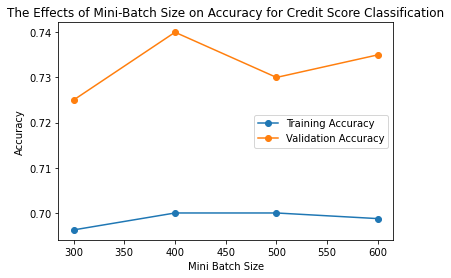

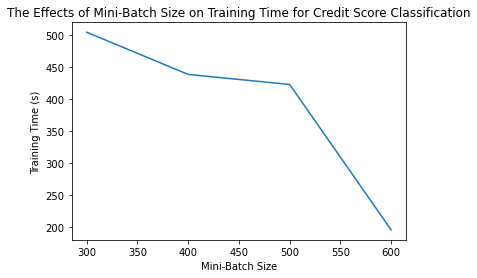

In [108]:
train_times2 = [504.41418266296387, 438.3311536312103] + [422.6757290363312, 194.92976140975952]
accuracies2 = [0.69625, 0.7000000000000001] + [0.7, 0.69875]
predictions2 = [0.725, 0.74] + [0.73, 0.735]

x =  accuracies2
x3 = predictions2
y = [300,400,500,600]

fig,ax=plt.subplots()
ax.set_title('The Effects of Mini-Batch Size on Accuracy for Credit Score Classification')
line1, = ax.plot(y, x, marker="o")
ax.set_xlabel("Mini Batch Size")
ax.set_ylabel("Accuracy")
line2, = ax.plot(y, x3, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()


x = y
y = train_times2
plt.plot(x, y)
plt.title('The Effects of Mini-Batch Size on Training Time for Credit Score Classification')
plt.xlabel('Mini-Batch Size')
plt.ylabel('Training Time (s)')
plt.show()

In [109]:
train_times2 = []
accuracies2 = []
predictions2 = []

learning_rates = [0.001, 0.01, 0.1]

minibatch_tester_2 = None
for b in learning_rates:
  if minibatch_tester_2 is None:
    minibatch_tester_2 = Tester(learning_rate=b, max_iters=int(best_valuesc[1]), alphaa=best_valuesc[2], beta1=best_valuesc[3], max_iterations=int(best_valuesc[4]),
                            max_no_change=int(best_valuesc[5]), adaptive=best_valuesc[6], beta2=best_valuesc[7], epsilon=best_valuesc[8], minibatch_size=int(best_valuesc[9]), regularize=int(best_valuesc[10]),
                            lambdaa=best_values[11])
  else:
    minibatch_tester_2.set_params(learning_rate=b, max_iters=int(best_valuesc[1]), alphaa=best_valuesc[2], beta1=best_valuesc[3], max_iterations=int(best_valuesc[4]),
                                max_no_change=int(best_valuesc[5]), adaptive=best_valuesc[6], beta2=best_valuesc[7], epsilon=best_valuesc[8], minibatch_size=int(best_valuesc[9]), regularize=int(best_valuesc[10]),
                                lambdaa=best_valuesc[11])
  start_time = time.time()
  a = minibatch_tester_2.fit(credit_final)
  run_time = time.time() - start_time
  predictions2.append(minibatch_tester_2.predict_score(credit_test_final, "class"))

  accuracies2.append(a)
  train_times2.append(run_time)

0.69875
0.69875
0.69875


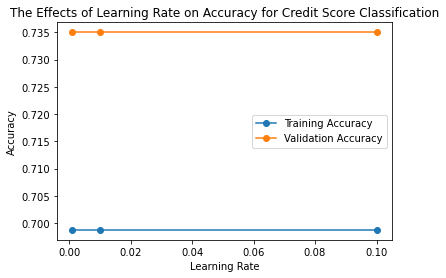

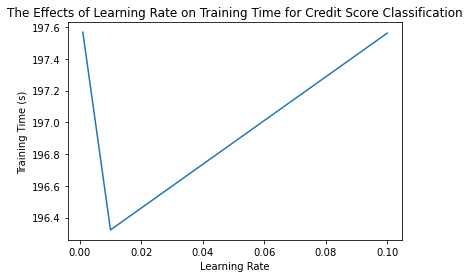

In [110]:
x =  accuracies2
x3 = predictions2
y = [0.001,0.01,0.1]

fig,ax=plt.subplots()
ax.set_title('The Effects of Learning Rate on Accuracy for Credit Score Classification')
line1, = ax.plot(y, x, marker="o")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")
line2, = ax.plot(y, x3, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()


x = y
y = train_times2
plt.plot(x, y)
plt.title('The Effects of Learning Rate on Training Time for Credit Score Classification')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (s)')
plt.show()

[475.05798983573914, 448.33304500579834, 445.74281072616577, 455.2339286804199, 405.65936255455017]
[0.9686895083236546, 0.9638211382113819, 0.9624249903213318, 0.96312185443283, 0.9519889663182347]
[0.9638888888888889, 0.9666666666666667, 0.9583333333333334, 0.9611111111111111, 0.9555555555555556]
[250, 500, 750, 1000, 1149]


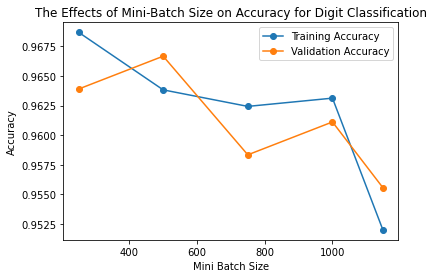

In [80]:
minib_sizes = [250, 500, 750, 1000, 1149]

print (train_times1)
print (accuracies1)
print (predictions1)
print (minib_sizes)

x =  accuracies1
x3 = predictions1


fig,ax=plt.subplots()
ax.set_title('The Effects of Mini-Batch Size on Accuracy for Digit Classification')
line1, = ax.plot(y, x, marker="o")
ax.set_xlabel("Mini Batch Size")
ax.set_ylabel("Accuracy")
line2, = ax.plot(y, x3, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()

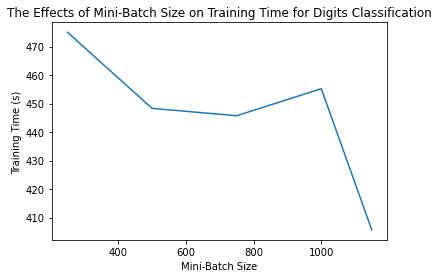

In [81]:
x = minib_sizes
y = train_times1
plt.plot(x, y)
plt.title('The Effects of Mini-Batch Size on Training Time for Digits Classification')
plt.xlabel('Mini-Batch Size')
plt.ylabel('Training Time (s)')
plt.show()

In [83]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]

train_times3 = []
# train_times2 = []
accuracies3 = []
# accuracies2 = []

predictions3 = []
# predictions2 = []

minibatch_tester3 = None
for b in learning_rates:
  if minibatch_tester3 is None:
    minibatch_tester3 = Tester(learning_rate=b, max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                            max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(best_values[9]), regularize=int(best_values[10]),
                            lambdaa=best_values[11])
  else:
    minibatch_tester3.set_params(learning_rate=b, max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                                max_no_change=int(best_values[5]), adaptive=best_values[6], beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(best_values[9]), regularize=int(best_values[10]),
                                lambdaa=best_values[11])
  start_time = time.time()
  a = minibatch_tester3.fit(digits_final)
  run_time = time.time() - start_time
  predictions3.append(minibatch_tester3.predict_score(digits_test_final, "target"))
  accuracies3.append(a)
  train_times3.append(run_time)

0.9519889663182347
0.9519889663182347
0.9519889663182347
0.9519889663182347


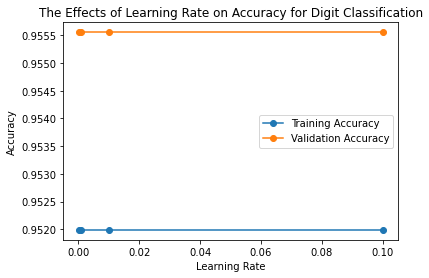

In [85]:
x = learning_rates
y1 = accuracies3
y2 = predictions3
fig,ax=plt.subplots()
ax.set_title('The Effects of Learning Rate on Accuracy for Digit Classification')
line1, = ax.plot(x, y1, marker="o")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")
line2, = ax.plot(x, y2, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()

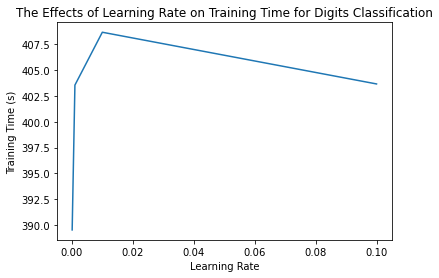

[389.54671263694763, 403.5362193584442, 408.6424832344055, 403.64810585975647]


In [88]:
x = learning_rates
y = train_times3
plt.plot(x, y)
plt.title('The Effects of Learning Rate on Training Time for Digits Classification')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (s)')
plt.show()

print (train_times3)

In [137]:
mini_sizes = [0]

train_times1 = []
# train_times2 = []
accuracies1 = []
# accuracies2 = []

predictions1 = []
# predictions2 = []

minibatch_tester = None
for b in mini_sizes:
  if minibatch_tester is None:
    minibatch_tester = Tester(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                            max_no_change=int(best_values[5]), adaptive=True, beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(0),
                            lambdaa=best_values[11])
  else:
    minibatch_tester.set_params(learning_rate=best_values[0], max_iters=int(best_values[1]), alphaa=best_values[2], beta1=best_values[3], max_iterations=int(best_values[4]),
                                max_no_change=int(best_values[5]), adaptive=True, beta2=best_values[7], epsilon=best_values[8], minibatch_size=int(b), regularize=int(0),
                                lambdaa=best_values[11])
  start_time = time.time()
  a = minibatch_tester.fit(credit_final)
  run_time = time.time() - start_time
  predictions1.append(minibatch_tester.predict_score(credit_test_final, "class"))

  
  accuracies1.append(a)
  train_times1.append(run_time)

<ipython-input-62-5025563d35f9>:12: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T
<ipython-input-62-5025563d35f9>:31: RuntimeWarning: invalid value encountered in greater_equal
  B = np.where(yh.ravel() >= 0.5, 1, 0)
<ipython-input-123-50fa2700bd3e>:100: RuntimeWarning: divide by zero encountered in log
  return - np.sum(np.log(output) * (y_target), axis=1)


0.3025


In [138]:
#ADAM Results Credit
print (train_times1)
print (accuracies1)
print (predictions1)

[208.34194350242615]
[0.3025]
[0.29]


In [136]:
#L1 Regularization Results Credit
print (train_times1)
print (accuracies1)
print (predictions1)

[491.5956652164459]
[0.7]
[0.7]


In [134]:
#L2 Regularization Results Credit
print (train_times1)
print (accuracies1)
print (predictions1)

[196.9598672389984]
[0.705]
[0.73]


In [131]:
#L2 Regularization Results Digits
print (train_times1)
print (accuracies1)
print (predictions1)

[387.5063099861145]
[0.9039609949670926]
[0.9]


In [129]:
#L1 Regularization Results Digits
print (train_times1)
print (accuracies1)
print (predictions1)

[382.8278784751892]
[0.3159722222222222]
[0.25]


In [125]:
#ADAM Results Digits
print (train_times1)
print (accuracies1)
print (predictions1)

[371.0429162979126]
[0.6604069879984514]
[0.7]


In [89]:
from sklearn.naive_bayes import GaussianNB

In [93]:
cross2 = Cross_Validation()
priors_to_test = [[0.1,0.9], [0.2,0.8], [0.3, 0.7], [0.4, 0.6], [0.5,0.5], [0.6, 0.4], [0.7, 0.3], [0.8,0.2], [0.9,0.1]]
res = []
times = []
xs = credit_test_final.loc[:,credit_test_final.columns != "class"]
ys = credit_test_final.loc[:,credit_test_final.columns == "class"]
accs = []
for p in priors_to_test:
  nb = GaussianNB(priors=p, var_smoothing=0.0025)
  start_t = time.time()
  res.append(cross2.cross_validate_nb(credit_final, 5, nb, ['target', 'class']))
  run_time = time.time() - start_t
  predictions22 = nb.predict(xs)
  acc = np.mean(predictions22 == ys.values.ravel())
  accs.append(acc)
  times.append(run_time)

[0.71875, 0.7274999999999999, 0.70875, 0.6937500000000001, 0.6737500000000001, 0.65125, 0.615, 0.5599999999999999, 0.45625]


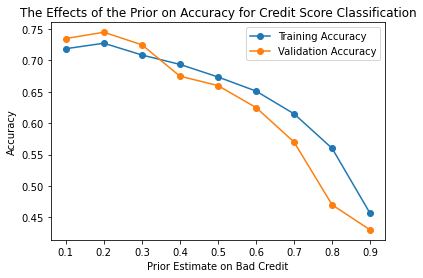

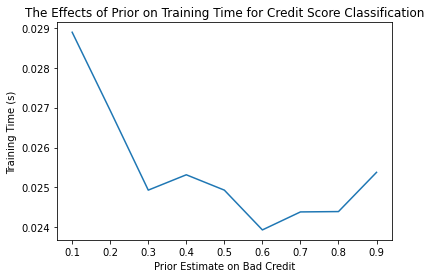

In [94]:
print (res)

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y1 = res
y2 = accs

# plt.plot(x, y)
# plt.title('The Effects of the Prior on Accuracy for Credit Score Classification')
# plt.xlabel('Prior Estimate on Bad Credit')
# plt.ylabel('Accuracy')
# plt.show()

fig,ax=plt.subplots()
ax.set_title('The Effects of the Prior on Accuracy for Credit Score Classification')
line1, = ax.plot(x, y1, marker="o")
ax.set_xlabel("Prior Estimate on Bad Credit")
ax.set_ylabel("Accuracy")
line2, = ax.plot(x, y2, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()

y = times
plt.plot(x, y)
plt.title('The Effects of Prior on Training Time for Credit Score Classification')
plt.xlabel('Prior Estimate on Bad Credit')
plt.ylabel('Training Time (s)')
plt.show()

In [95]:
cross3 = Cross_Validation()
smoothings = np.arange(1e-11, 1e-1, 5e-4)
res2 = []

times2 = []
xs2 = credit_test_final.loc[:,credit_test_final.columns != "class"]
ys2 = credit_test_final.loc[:,credit_test_final.columns == "class"]
accs2 = []
for s in smoothings:
  nb2 = GaussianNB(priors=[0.2,0.8], var_smoothing=s)
  start_t = time.time()
  res2.append(cross3.cross_validate_nb(credit_final, 5, nb2, ['target', 'class']))
  run_time = time.time() - start_t
  predictions222 = nb2.predict(xs2)
  acc = np.mean(predictions222 == ys2.values.ravel())
  accs2.append(acc)
  times2.append(run_time)

[0.7237500000000001, 0.725, 0.7262500000000001, 0.7250000000000001, 0.7237500000000001, 0.7274999999999999, 0.72375, 0.71875, 0.7212500000000001, 0.71875, 0.7212500000000001, 0.7262500000000001, 0.725, 0.7237500000000001, 0.7249999999999999, 0.7262500000000001, 0.7237500000000001, 0.72375, 0.725, 0.725, 0.7212500000000002, 0.7237500000000001, 0.7237500000000001, 0.7262500000000001, 0.7262500000000001, 0.72375, 0.7212500000000001, 0.7237500000000001, 0.7250000000000001, 0.7250000000000001, 0.7250000000000001, 0.72375, 0.7249999999999999, 0.72375, 0.72375, 0.7249999999999999, 0.7249999999999999, 0.72375, 0.7225, 0.7225, 0.71875, 0.71875, 0.7162499999999999, 0.7175, 0.7175, 0.7175, 0.7162499999999999, 0.7175, 0.7162499999999999, 0.715, 0.7162499999999999, 0.7162499999999999, 0.7162499999999999, 0.7162499999999999, 0.7162499999999999, 0.7162499999999999, 0.7162499999999999, 0.7175, 0.7175, 0.7162499999999999, 0.7162499999999999, 0.7175, 0.7175, 0.7175, 0.7162499999999999, 0.715000000000000

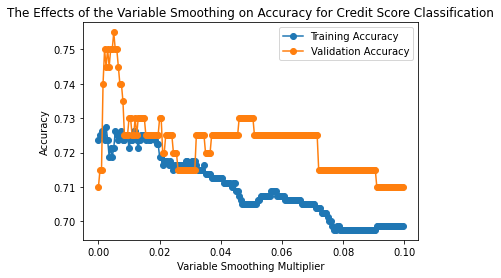

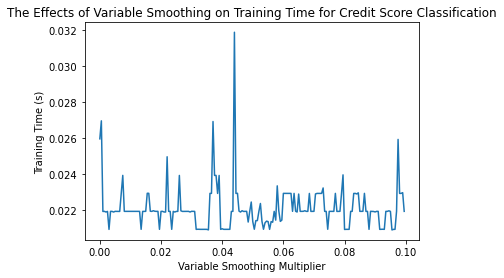

In [96]:
print (res2)
x =  np.arange(1e-11, 1e-1, 5e-4)
y1 = res2
y2 = accs2
# plt.plot(x, y)
# plt.title('The Effects of the Variable Smoothing on Accuracy for Credit Score Classification')
# plt.xlabel('Variable Smoothing Multiplier')
# plt.ylabel('Accuracy')
# plt.show()

fig,ax=plt.subplots()
ax.set_title('The Effects of the Variable Smoothing on Accuracy for Credit Score Classification')
line1, = ax.plot(x, y1, marker="o")
ax.set_xlabel("Variable Smoothing Multiplier")
ax.set_ylabel("Accuracy")
line2, = ax.plot(x, y2, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()

y = times2
plt.plot(x, y)
plt.title('The Effects of Variable Smoothing on Training Time for Credit Score Classification')
plt.xlabel('Variable Smoothing Multiplier')
plt.ylabel('Training Time (s)')
plt.show()

In [111]:
cross2 = Cross_Validation()
priors_to_test = [10*[0.1], [0.4]+ 9*([0.6/9]), ([0.6/9]) + [0.4] + 8*([0.6/9]), 2*[0.6/9] + [0.4] + 7*([0.6/9]), 3*[0.6/9] + [0.4] + 6*([0.6/9]), 4*([0.6/9]) + [0.4] + 5*([0.6/9]), 5*[0.6/9] + [0.4] + 4*([0.6/9]), 6*[0.6/9] + [0.4] + 3*([0.6/9]), 7*[0.6/9] + [0.4] + 2*([0.6/9]), 8*[0.6/9] + [0.4] + 1*([0.6/9]), 9*[0.6/9] + [0.4]]
print (len(priors_to_test))
res = []
times = []
xs = digits_test_final.loc[:,digits_test_final.columns != "target"]
ys = digits_test_final.loc[:,digits_test_final.columns == "target"]
accs = []
for p in priors_to_test:
  nb = GaussianNB(priors=p, var_smoothing=0.0335)
  start_t = time.time()
  res.append(cross2.cross_validate_nb(digits_final, 5, nb, ['target', 'class']))
  run_time = time.time() - start_t
  predictions22 = nb.predict(xs)
  acc = np.mean(predictions22 == ys.values.ravel())
  accs.append(acc)
  times.append(run_time)

11


In [112]:
print (res)
print (accs)
print (times)

[0.9178789198606273, 0.9185757839721255, 0.9164851916376306, 0.9171820557491289, 0.9171820557491289, 0.9171844754161829, 0.917881339527681, 0.9178789198606273, 0.9178789198606273, 0.9178861788617887, 0.9157931668602399]
[0.9361111111111111, 0.9361111111111111, 0.9361111111111111, 0.9388888888888889, 0.9305555555555556, 0.9361111111111111, 0.9361111111111111, 0.9361111111111111, 0.9333333333333333, 0.9361111111111111, 0.9333333333333333]
[0.045839548110961914, 0.03693723678588867, 0.033907413482666016, 0.03391265869140625, 0.03690218925476074, 0.03693819046020508, 0.0339045524597168, 0.034905195236206055, 0.03394198417663574, 0.03491997718811035, 0.03491640090942383]


In [113]:
cross2 = Cross_Validation()
smoothings = np.arange(1e-11, 1e-1, 5e-4)
pri = [0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1, 0.1]
res = []
times = []
xs = digits_test_final.loc[:,digits_test_final.columns != "target"]
ys = digits_test_final.loc[:,digits_test_final.columns == "target"]
accs = []
for p in smoothings:
  nb = GaussianNB(priors=pri, var_smoothing=p)
  start_t = time.time()
  res.append(cross2.cross_validate_nb(digits_final, 5, nb, ['target', 'class']))
  run_time = time.time() - start_t
  predictions22 = nb.predict(xs)
  acc = np.mean(predictions22 == ys.values.ravel())
  accs.append(acc)
  times.append(run_time)

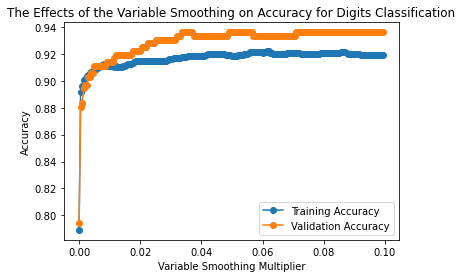

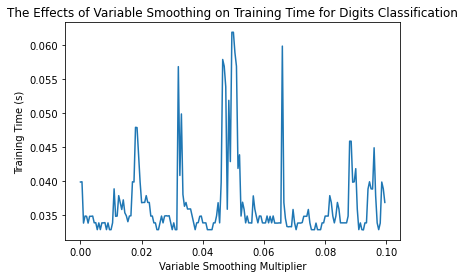

In [114]:
x =  np.arange(1e-11, 1e-1, 5e-4)
y1 = res
y2 = accs
# plt.plot(x, y)
# plt.title('The Effects of the Variable Smoothing on Accuracy for Credit Score Classification')
# plt.xlabel('Variable Smoothing Multiplier')
# plt.ylabel('Accuracy')
# plt.show()

fig,ax=plt.subplots()
ax.set_title('The Effects of the Variable Smoothing on Accuracy for Digits Classification')
line1, = ax.plot(x, y1, marker="o")
ax.set_xlabel("Variable Smoothing Multiplier")
ax.set_ylabel("Accuracy")
line2, = ax.plot(x, y2, marker="o")

line1.set_label('Training Accuracy')
line2.set_label('Validation Accuracy')
ax.legend()

plt.show()

y = times
plt.plot(x, y)
plt.title('The Effects of Variable Smoothing on Training Time for Digits Classification')
plt.xlabel('Variable Smoothing Multiplier')
plt.ylabel('Training Time (s)')
plt.show()